# Data Cleaning and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\projects_endtoend\Elevate Labs\Titanic-Dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## columns

data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
## shape of the data
data.shape

(891, 12)

In [6]:
## null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
## duplicates
data.duplicated().sum()

0

In [8]:
## infomation about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Handling Missing Values

* Imputing missing values of categorical features with mode
* Imputing missing values of numerical features with median

In [9]:
## numerical column imputation

data['Age'] = data['Age'].fillna(data['Age'].median())

In [10]:
## caegorical column imputation

data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Handling Outliers

In [12]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
categorical = data.select_dtypes(include=['object']).columns
numerical = data.select_dtypes(exclude=['object']).columns

In [14]:
categorical

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [15]:
numerical

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

### IQR Method

### IQR method on Age column

In [16]:
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [17]:
## no. of rows below lower bound
data[data['Age']<lower].shape

(24, 12)

In [18]:
## no. of rows above upper bound
data[data['Age']>upper].shape

(42, 12)

In [19]:
## trimming the rows
new_data = data[(data['Age']<lower) | (data['Age']>upper)]

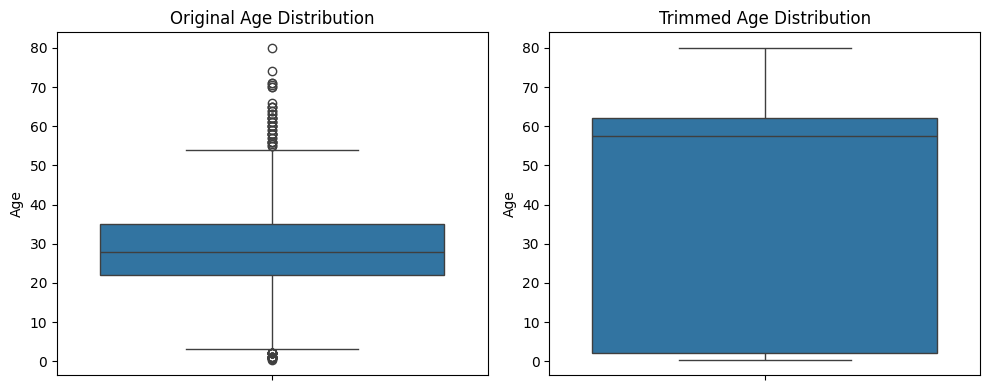

In [20]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(data['Age'])
plt.title('Original Age Distribution')

plt.subplot(1,2,2)
sns.boxplot(new_data['Age'])
plt.title('Trimmed Age Distribution')

plt.tight_layout()
plt.show()

### IQR method on Fare column

In [21]:
q1 = data['Fare'].quantile(0.25)
q3 = data['Fare'].quantile(0.75)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [22]:
## no. of rows below lower bound
data[data['Fare']<lower].shape

(0, 12)

In [23]:
## no. of rows above upper bound
data[data['Fare']>upper].shape

(116, 12)

In [24]:
## triming the rows
new_data2 = data[(data['Fare']<lower) | (data['Fare']>upper)]

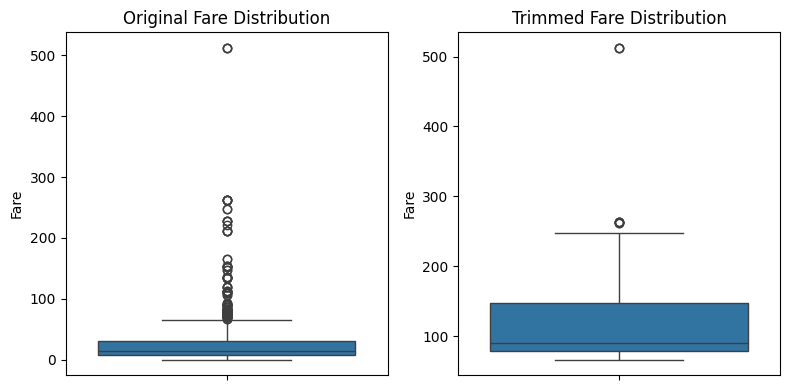

In [25]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.boxplot(data['Fare'])
plt.title('Original Fare Distribution')

plt.subplot(1,2,2)
sns.boxplot(new_data2['Fare'])
plt.title('Trimmed Fare Distribution')

plt.tight_layout()
plt.show()

### Heat map of numerical columns

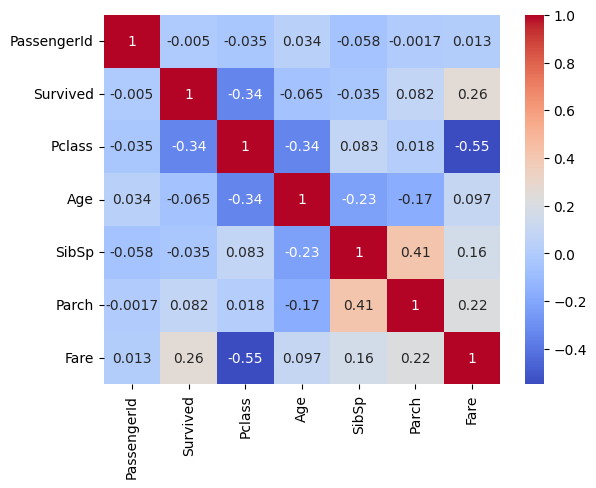

In [27]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

## Encoding
* converting categorical columns into numerical columns using encoding techniques

In [28]:
categorical

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [29]:
numerical

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [30]:
# dropping name,passengerid,ticket columns
data.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

In [31]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,B96 B98,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,B96 B98,S


In [32]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Selecting categorical columns for one-hot encoding
categories = data[['Sex','Cabin', 'Embarked']]

# fit and transform
encoded = ohe.fit_transform(categories)

# Get column names for the one-hot encoded features
encoded_columns = ohe.get_feature_names_out(categories.columns)

# Create a DataFrame from the encoded array
encoded_df = pd.DataFrame(encoded, columns=encoded_columns)

# Drop original categorical columns and concatenate the encoded ones
data = data.drop(['Sex', 'Cabin', 'Embarked'], axis=1)

data = pd.concat([data, encoded_df], axis=1)               


In [33]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Splitting the data

In [35]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape

(712, 157)

In [37]:
X_test.shape

(179, 157)

## Standardization

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## scaling x_train and x_test

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [40]:
X_train_scaled.shape

(712, 157)

In [41]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
331,1,45.5,0,0,28.5000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
733,2,23.0,0,0,13.0000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
382,3,32.0,0,0,7.9250,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
704,3,26.0,1,0,7.8542,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
813,3,6.0,4,2,31.2750,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
270,1,28.0,0,0,31.0000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
860,3,41.0,2,0,14.1083,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
435,1,14.0,1,2,120.0000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
709,3,28.0,1,1,15.2458,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
439,2,31.0,0,0,10.5000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
840,3,20.0,0,0,7.9250,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
720,2,6.0,0,1,33.0000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39,3,14.0,1,0,11.2417,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,3,17.0,0,0,7.1250,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
773,3,28.0,0,0,7.2250,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25,3,38.0,1,5,31.3875,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
84,2,17.0,0,0,10.5000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Model Building

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
lor = LogisticRegression()

lor.fit(X_train_scaled, y_train)

y_pred = lor.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model: {accuracy:.2f}")


Accuracy of Logistic Regression model: 0.79
